<a href="https://colab.research.google.com/github/Coleg2005/AiMoneyMaker/blob/main/aimoneymaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
stock_data = yf.download('DAC', start='2020-05-21', end='2024-10-14')
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-21,4.220000,4.280000,4.120000,4.160000,3.620547,67700
2020-05-22,4.200000,4.200000,3.970000,4.130000,3.594438,74700
2020-05-26,4.130000,4.230000,4.040000,4.080000,3.550921,108600
2020-05-27,4.200000,4.420000,4.110000,4.410000,3.838128,112700
2020-05-28,4.430000,4.450000,4.220000,4.250000,3.698876,50600
...,...,...,...,...,...,...
2024-10-01,86.370003,87.440002,85.589996,86.849998,86.849998,81000
2024-10-02,87.230003,88.349998,87.230003,87.800003,87.800003,77300
2024-10-03,87.540001,88.459999,87.279999,87.279999,87.279999,81600


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
scaled_data = scaler.fit_transform(stock_data["Close"].values.reshape(-1, 1))

In [ ]:
import numpy as np

def create_dataset(data, time_step):
  x, y = [], []
  for i in range(len(data) - time_step - 1):
    x.append(data[i:(i + time_step), 0])
    y.append(data[i + time_step, 0])

  return np.array(x), np.array(y)

In [ ]:
time_step = 100

x, y = create_dataset(scaled_data, time_step)

In [ ]:
train_size = 0.8

In [ ]:
x_train, x_test = x[:int(x.shape[0]*train_size)], x[int(x.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(64))
model.add(Dense(64))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.1335
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0123
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 0.0050
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 0.0034
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0025
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0017
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0016
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0015
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0015
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - loss: 0.0015


In [ ]:
test_loss = model.evaluate(x_test, y_test)
test_loss

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.2680e-04


0.0008701023762114346

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [ ]:
original_data = stock_data["Close"].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

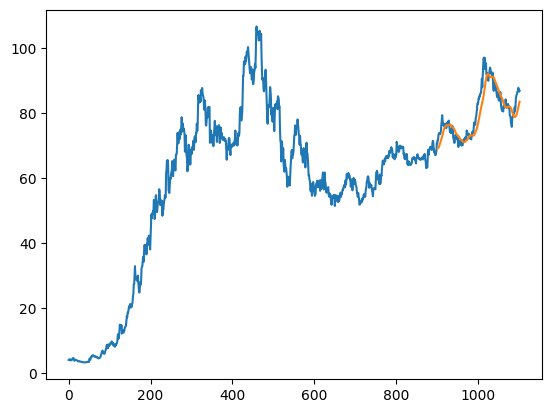

In [ ]:
import matplotlib.pyplot as plt

plt.plot(original_data)
plt.plot(predicted_data)

In [ ]:
new_predictions = model.predict(x_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


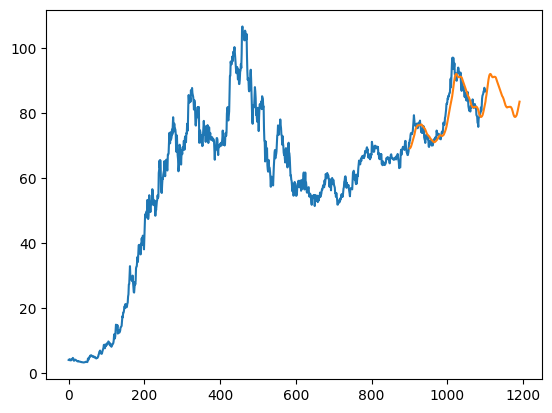

In [ ]:
plt.plot(original_data)
plt.plot(predicted_data)